In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller

# Download EUR/USD data
eurusd = yf.download('EURUSD=X', start='2020-01-01', end='2023-12-31')
prices = eurusd['Close']


/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_16253/2374219640.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  eurusd = yf.download('EURUSD=X', start='2020-01-01', end='2023-12-31')
[*********************100%***********************]  1 of 1 completed


In [6]:
# Augmented Dickey-Fuller Test for Stationarity
def perform_adf_test(series, title):
    print(f"\nADF Test for {title}:")
    result = adfuller(series.dropna())

    print(f'ADF Statistic: {result[0]:.4f}')
    print(f'p-value: {result[1]:.4f}')
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.4f}')

    if result[1] < 0.05:
        print("Series is stationary (reject null hypothesis)")
    else:
        print("Series is non-stationary (fail to reject null hypothesis)")

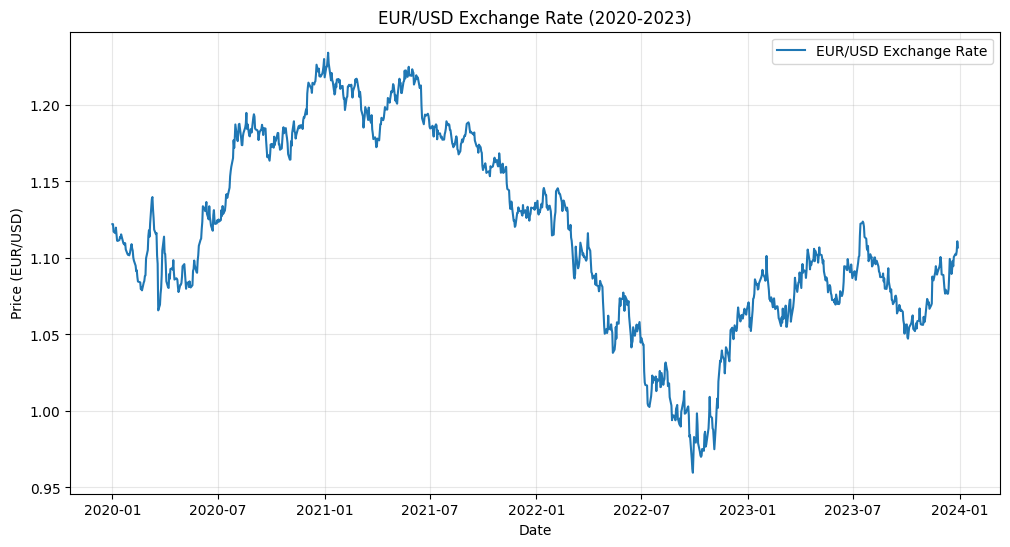

In [2]:
# Visualize the data
plt.figure(figsize=(12, 6))
plt.plot(prices, label='EUR/USD Exchange Rate')
plt.title('EUR/USD Exchange Rate (2020-2023)')
plt.xlabel('Date')
plt.ylabel('Price (EUR/USD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


In [3]:

# ADF Test for stationarity
adf_result = adfuller(prices.dropna())
print("ADF Test Results:")
print(f"Test Statistic: {adf_result[0]:.4f}")
print(f"p-value: {adf_result[1]:.4f}")
print(f"Critical Values:")
for key, value in adf_result[4].items():
    print(f"  {key}: {value:.4f}")

# Interpretation
if adf_result[1] <= 0.05:
    print("\n✅ The series is STATIONARY (p-value <= 0.05)")
else:
    print("\n❌ The series is NON-STATIONARY (p-value > 0.05)")
    print("   We need to make it stationary for better predictions")

ADF Test Results:
Test Statistic: -1.3633
p-value: 0.5997
Critical Values:
  1%: -3.4366
  5%: -2.8643
  10%: -2.5682

❌ The series is NON-STATIONARY (p-value > 0.05)
   We need to make it stationary for better predictions


In [4]:
# Method 1: Differencing (most common for financial data)
prices_diff = prices.diff().dropna()

# Method 2: Percentage change (returns)
returns = prices.pct_change().dropna() * 100  # In percentage

display(prices_diff.head())
display(returns.head())

Ticker,EURUSD=X
Date,
2020-01-02,0.000000
2020-01-03,-0.004939
2020-01-06,-0.000948
2020-01-07,0.003603
2020-01-08,-0.004326


Ticker,EURUSD=X
Date,
2020-01-02,0.000000
2020-01-03,-0.440149
2020-01-06,-0.084834
2020-01-07,0.322834
2020-01-08,-0.386286


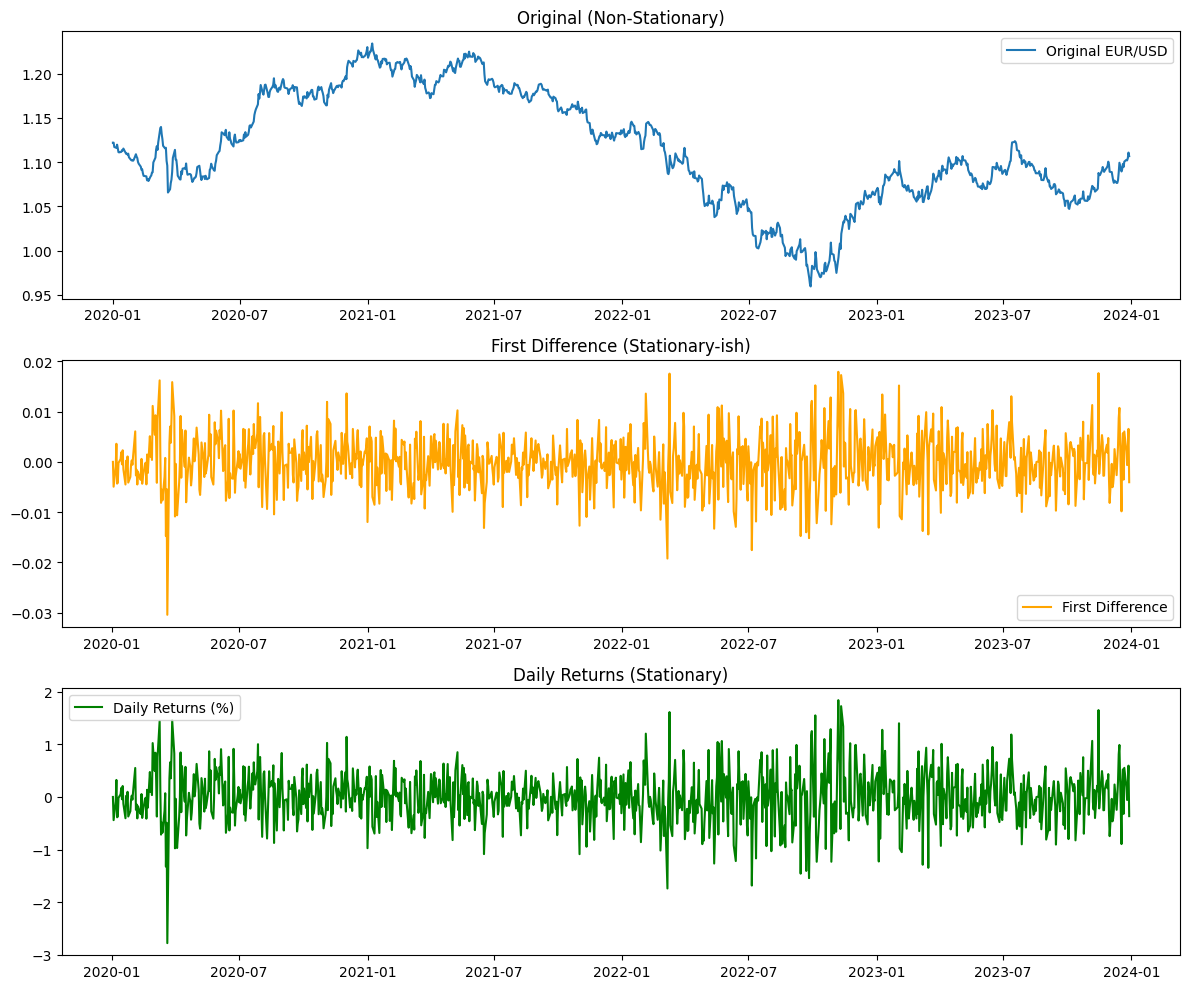

Returns p-value: 0.000000
✅ Returns are stationary - good for modeling!


In [5]:

# Plot original vs stationary data
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

# Original data
axes[0].plot(prices, label='Original EUR/USD')
axes[0].set_title('Original (Non-Stationary)')
axes[0].legend()

# First difference
axes[1].plot(prices_diff, label='First Difference', color='orange')
axes[1].set_title('First Difference (Stationary-ish)')
axes[1].legend()

# Returns
axes[2].plot(returns, label='Daily Returns (%)', color='green')
axes[2].set_title('Daily Returns (Stationary)')
axes[2].legend()

plt.tight_layout()
plt.show()

# Test if returns are stationary
returns_adf = adfuller(returns.dropna())
print(f"Returns p-value: {returns_adf[1]:.6f}")
if returns_adf[1] <= 0.05:
    print("✅ Returns are stationary - good for modeling!")

In [9]:
# Perform ADF test on both series
perform_adf_test(prices_diff, "Prices (First Difference)")
perform_adf_test(returns, "Returns (First Difference)")


ADF Test for Prices (First Difference):
ADF Statistic: -31.0151
p-value: 0.0000
Critical Values:
	1%: -3.4366
	5%: -2.8643
	10%: -2.5683
Series is stationary (reject null hypothesis)

ADF Test for Returns (First Difference):
ADF Statistic: -30.8649
p-value: 0.0000
Critical Values:
	1%: -3.4366
	5%: -2.8643
	10%: -2.5683
Series is stationary (reject null hypothesis)


# 2 Return (%) vs Difference tests

In [10]:
# Method 1: Difference
diff = prices.diff().dropna()

# Method 2: Returns
returns = prices.pct_change().dropna()

# Test stationarity for all three
print("ADF TEST RESULTS (p-values):")
print("=" * 50)

# Original prices
adf_original = adfuller(prices.dropna())
print(f"Original prices:     {adf_original[1]:.10f}")

# Differences
adf_diff = adfuller(diff.dropna())
print(f"First difference:    {adf_diff[1]:.10f}")

# Returns
adf_returns = adfuller(returns.dropna())
print(f"Returns:             {adf_returns[1]:.10f}")

# Interpretation
print("\n" + "=" * 50)
print("INTERPRETATION:")
print("p-value ≤ 0.05 → Stationary ✅")
print("p-value > 0.05 → Non-stationary ❌")
print("=" * 50)

if adf_original[1] > 0.05:
    print("Original prices → NON-STATIONARY ❌ (has trends)")
    
if adf_diff[1] <= 0.05:
    print("First difference → STATIONARY ✅ (usually)")
else:
    print("First difference → MAY need more differencing")

if adf_returns[1] <= 0.05:
    print("Returns → STATIONARY ✅ (good for modeling)")

ADF TEST RESULTS (p-values):
Original prices:     0.5997417232
First difference:    0.0000000000
Returns:             0.0000000000

INTERPRETATION:
p-value ≤ 0.05 → Stationary ✅
p-value > 0.05 → Non-stationary ❌
Original prices → NON-STATIONARY ❌ (has trends)
First difference → STATIONARY ✅ (usually)
Returns → STATIONARY ✅ (good for modeling)
